In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math 
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd  # To play sound in the notebook
import librosa
import librosa.display

In [5]:
# reference - https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

In [6]:
audio_files_dir='../Data/archive-2/recordings/recordings/'

In [7]:
data=pd.read_csv('../Data/File_for_modeling.csv')

In [8]:
data.head()

age  age_onset                             birthplace   filename  \
0  19.0        9.0             shady grove, maryland, usa   arabic38   
1  32.0       12.0            fort collins, colorado, usa   arabic45   
2  19.0        3.0  washington, district of columbia, usa   arabic78   
3  43.0       40.0               jianchuan, yunnan, china       bai1   
4  34.0        3.5           durgapur, west bengal, india  bengali11   

  native_language     sex  speakerid country  file_missing?  
0          arabic  female       1394     usa          False  
1          arabic  female       1456     usa          False  
2          arabic  female       1897     usa          False  
3             bai  female         28   china          False  
4         bengali    male       1018   india          False

Lets visulize some audio features from audio files from person from each country we selected.

In [9]:
data['native_language'].value_counts()

english      630
mandari       95
mandarin      56
hindi         34
cantonese     23
bengali       20
telugu        14
tamil         13
cantone       12
punjabi       12
taiwane       11
gujarat        9
kannada        9
gujarati       8
wu\n(wuu       5
malayal        4
uyghur         3
xiang          3
arabic         3
marathi        3
malayalam      3
xiang\n(       3
hakka\n(       3
urdu           2
greek          2
oriya          2
kikongo        1
konkani        1
french         1
yupik          1
russian        1
tibetan        1
spanish        1
tagalog        1
yiddish        1
wu             1
hainane        1
gan            1
mongolian      1
min nan        1
teochew        1
bai            1
farsi          1
twi            1
naxi           1
korean         1
taishan        1
Name: native_language, dtype: int64

In [10]:
data.shape

(1003, 9)

In [11]:
data.iloc[32].filename

'english10'

In [12]:
#Loading audio file using Librosa
x,sr=librosa.load(audio_files_dir+data.iloc[32].filename+'.mp3')

/Users/sonalibhatia/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [13]:
type(x) , type(sr)

(numpy.ndarray, int)

In [14]:
print(x.shape) , sr

(475680,)


(None, 22050)

In [15]:
data[data['native_language']=='mandarin']

age  age_onset                      birthplace    filename  \
445  26.0       13.0  shanxi province, shanxi, china   mandarin1   
446  19.0        3.0                  beijing, china  mandarin10   
447  49.0       20.0         dalian, liaoning, china  mandarin14   
448  26.0       13.0             wuhan, hubei, china  mandarin17   
449  27.0       13.0         qinzhou, guangxi, china  mandarin19   
450  38.0       14.0                  nanjing, china   mandarin2   
451  38.0        9.0         chengdu, sichuan, china  mandarin21   
452  39.0       11.0           haikou, hainan, china  mandarin22   
453  21.0       10.0                 shanghai, china  mandarin24   
454  28.0       13.0            wuxi, jiangsu, china  mandarin25   
455  31.0       12.0            emei, sichuan, china  mandarin26   
456  18.0       15.0         chengdu, sichuan, china  mandarin27   
457  45.0       15.0                 shanghai, china  mandarin28   
458  24.0        4.0           lanzhou, gansu, china  mandarin29   
459  43.0       10.0        jilin city, jilin, china   mandarin3   
460  26.0       13.0        wenzhou, zhejiang, china  mandarin31   
461  25.0        6.0                  beijing, china  mandarin33   
462  31.0       13.0    shi jia zhuang, hebei, china  mandarin34   
463  27.0       12.0         yantai, shandong, china  mandarin35   
464  32.0       10.0                  beijing, china  mandarin36   
465  32.0       12.0       huhot, nei meng gu, china  mandarin37   
466  33.0       12.0          changsha, hunan, china  mandarin38   
467  24.0       12.0       tie ling, liaoning, china  mandarin39   
468  24.0        6.0                 shanghai, china   mandarin4   
469  28.0       12.0         chengdu, sichuan, china  mandarin40   
470  34.0       13.0          songyuan, jilin, china  mandarin41   
471  47.0       16.0           yanbian, jilin, china  mandarin42   
472  24.0       15.0           datong, shanxi, china  mandarin43   
473  21.0       16.0       hangzhou, zhejiang, china  mandarin44   
474  42.0       12.0                  beijing, china  mandarin45   
475  43.0        9.0        jilin city, jilin, china  mandarin46   
476  28.0        8.0                  beijing, china  mandarin47   
477  37.0       12.0      pingdingshan, henan, china  mandarin48   
478  21.0       10.0                 shanghai, china  mandarin49   
479  31.0       12.0                  beijing, china   mandarin5   
480  25.0       10.0           tianjin, hebei, china  mandarin51   
481  26.0        6.0       shaoxing, zhejiang, china  mandarin52   
482  38.0       13.0         ningbo, zhejiang, china  mandarin53   
483  25.0       10.0         chengdu, sichuan, china  mandarin54   
484  25.0       13.0             loudi, hunan, china  mandarin55   
485  26.0       11.0           baoding, hebei, china  mandarin56   
486  20.0       12.0                 shanghai, china  mandarin57   
487  23.0        7.0         superior, colorado, usa  mandarin58   
488  20.0        6.0          kunming, yunnan, china  mandarin59   
489  28.0       12.0         le shan, sichuan, china   mandarin6   
490  41.0       13.0         guiyang, guizhou, china  mandarin60   
491  33.0       16.0        shangrao, jiangxi, china  mandarin61   
492  24.0        7.0                 shanghai, china  mandarin62   
493  27.0       12.0           jiaozuo, henan, china  mandarin63   
494  24.0       10.0           fuzhou, fujian, china  mandarin64   
495  20.0        5.0           tianjin, hebei, china  mandarin65   
496  22.0        5.0       berkeley, california, usa   mandarin7   
497  29.0       12.0           jingmen, hubei, china   mandarin8   
498  38.0       12.0                 shanghai, china   mandarin9   
668  40.0       12.0         ping tong, taiwan (map)  mandarin20   
669  19.0        2.0     johor bahru, malaysia (map)  mandarin79   

    native_language      sex  speakerid country  file_missing?  
445        mandarin   female        256   china          False  

# Audio file and audio array plot of from speaker from Country=USA and Native langauage=English

In [47]:
ipd.Audio(audio_files_dir+data.iloc[32].filename+'.mp3')

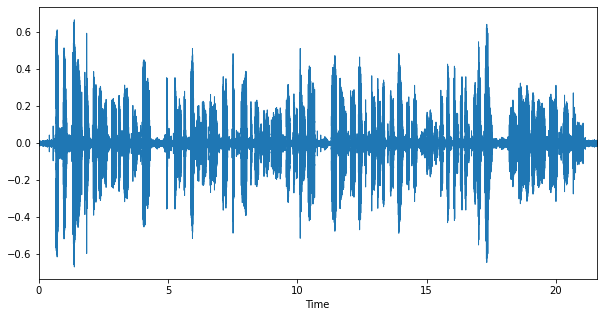

In [52]:
plt.figure(figsize=(10, 5))
ax=librosa.display.waveplot(x, sr=sr);
ax.figure.savefig('../images/audio_waveplot.png')

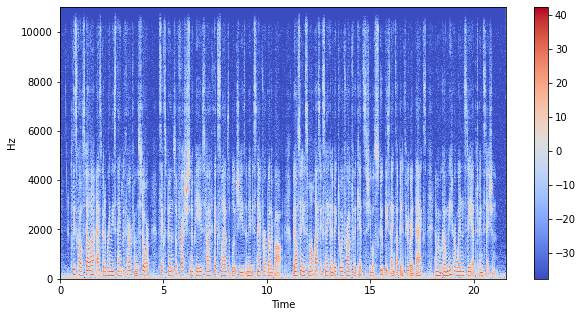

In [53]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(10, 5))
ax=librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar();
ax.figure.savefig('../images/spectogram.png')

In [22]:
mfcc_usa = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)

In [23]:
mfcc_us1=np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13),axis=1)
len(mfcc_us1)


13

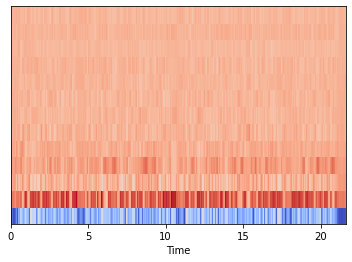

In [24]:
librosa.display.specshow(mfcc_usa, sr=sr, x_axis='time');


# Getting Audio file for person whose Country = China 

In [25]:
ch_filename=data.iloc[463].filename

In [26]:
ch_filename

'mandarin35'

In [27]:
x_ch , sr_ch=librosa.load(audio_files_dir+ch_filename+'.mp3')

/Users/sonalibhatia/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [28]:
ipd.Audio(audio_files_dir+ch_filename+'.mp3')

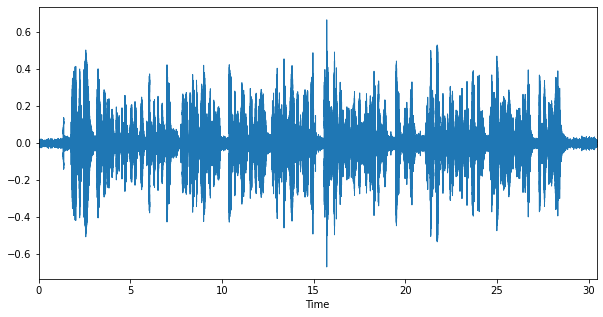

In [30]:
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x_ch, sr=sr_ch);

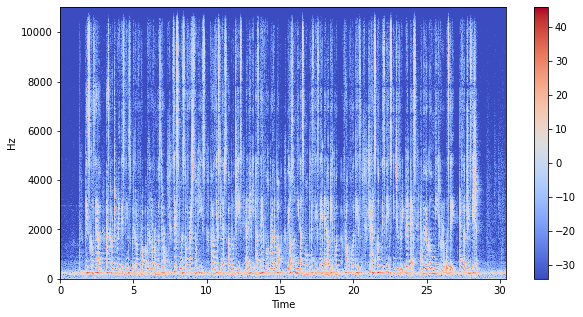

In [32]:
X_ch = librosa.stft(x_ch)
Xdb_ch = librosa.amplitude_to_db(abs(X_ch))
plt.figure(figsize=(10, 5))
librosa.display.specshow(Xdb_ch, sr=sr_ch, x_axis='time', y_axis='hz')
plt.colorbar();

In [31]:
mfcc_ch = librosa.feature.mfcc(y=x_ch, sr=sr_ch, n_mfcc=13)


In [32]:
mfcc_ch1=np.mean(librosa.feature.mfcc(y=x_ch, sr=sr_ch, n_mfcc=13),axis=1)
len(mfcc_ch)


13

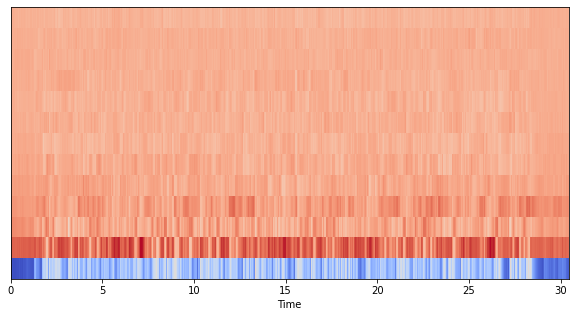

In [54]:
plt.figure(figsize=(10, 5))
ax=librosa.display.specshow(mfcc_ch, sr=sr_ch, x_axis='time');
ax.figure.savefig('../images/MFCC.png')

# Getting audio file for person where country='uk'

In [34]:
uk_filename = data.iloc[765].filename
uk_filename

'english41'

In [35]:
x_uk , sr_uk=librosa.load(audio_files_dir+uk_filename+'.mp3')

/Users/sonalibhatia/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [36]:
ipd.Audio(audio_files_dir+uk_filename+'.mp3')

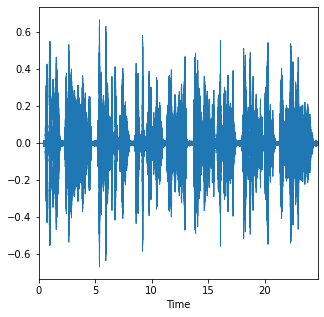

In [38]:
plt.figure(figsize=(5, 5))
librosa.display.waveplot(x_uk, sr=sr_uk);

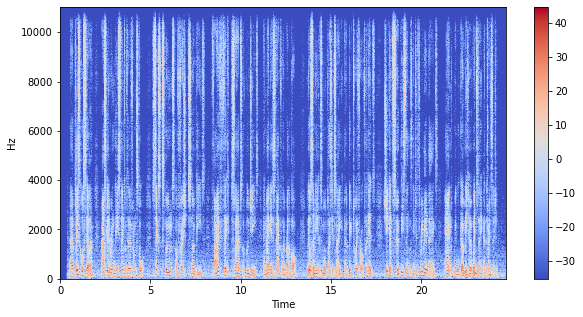

In [39]:
X_uk = librosa.stft(x_uk)
Xdb_uk = librosa.amplitude_to_db(abs(X_uk))
plt.figure(figsize=(10, 5))
librosa.display.specshow(Xdb_uk, sr=sr_uk, x_axis='time', y_axis='hz')
plt.colorbar();

In [40]:
mfcc_uk = librosa.feature.mfcc(y=x_uk, sr=sr_uk, n_mfcc=13)

mfcc_uk1=np.mean(librosa.feature.mfcc(y=x_uk, sr=sr_uk , n_mfcc=13),axis=1 )
len(mfcc_uk)

13

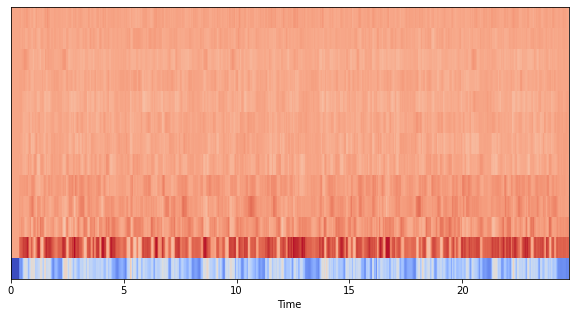

In [41]:
plt.figure(figsize=(10, 5))
librosa.display.specshow(mfcc_uk, sr=sr_uk, x_axis='time');


# Getting audio file for person where country = 'India'

In [42]:
in_filename = data.iloc[510].filename
in_filename

'punjabi5'

In [43]:
x_in , sr_in=librosa.load(audio_files_dir+in_filename+'.mp3')

/Users/sonalibhatia/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [44]:
ipd.Audio(audio_files_dir+in_filename+'.mp3')

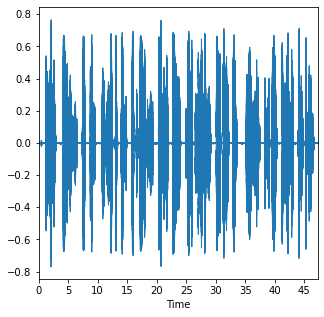

In [45]:
plt.figure(figsize=(5, 5))
librosa.display.waveplot(x_in, sr=sr_in);

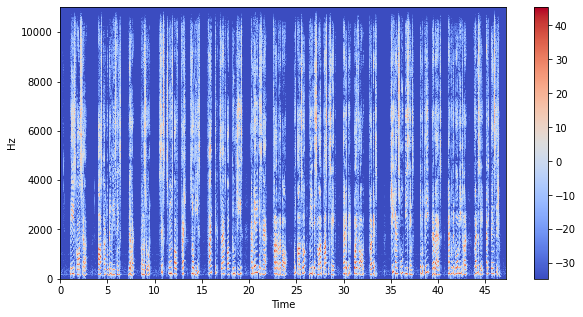

In [48]:
X_in = librosa.stft(x_in)
Xdb_in = librosa.amplitude_to_db(abs(X_in))
plt.figure(figsize=(10, 5))
librosa.display.specshow(Xdb_in, sr=sr_in, x_axis='time', y_axis='hz')
plt.colorbar();

In [49]:
mfcc_in = librosa.feature.mfcc(y=x_in, sr=sr_in, n_mfcc=13)

In [50]:
mfcc_in1=np.mean(librosa.feature.mfcc(y=x_in, sr=sr_in, n_mfcc=13),axis=1)
len(mfcc_in1)

13

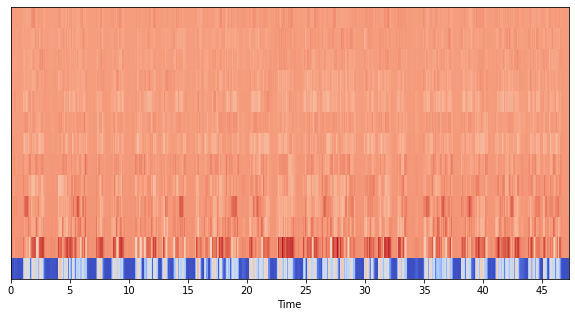

In [51]:
plt.figure(figsize=(10, 5))
librosa.display.specshow(mfcc_in, sr=sr_in, x_axis='time');



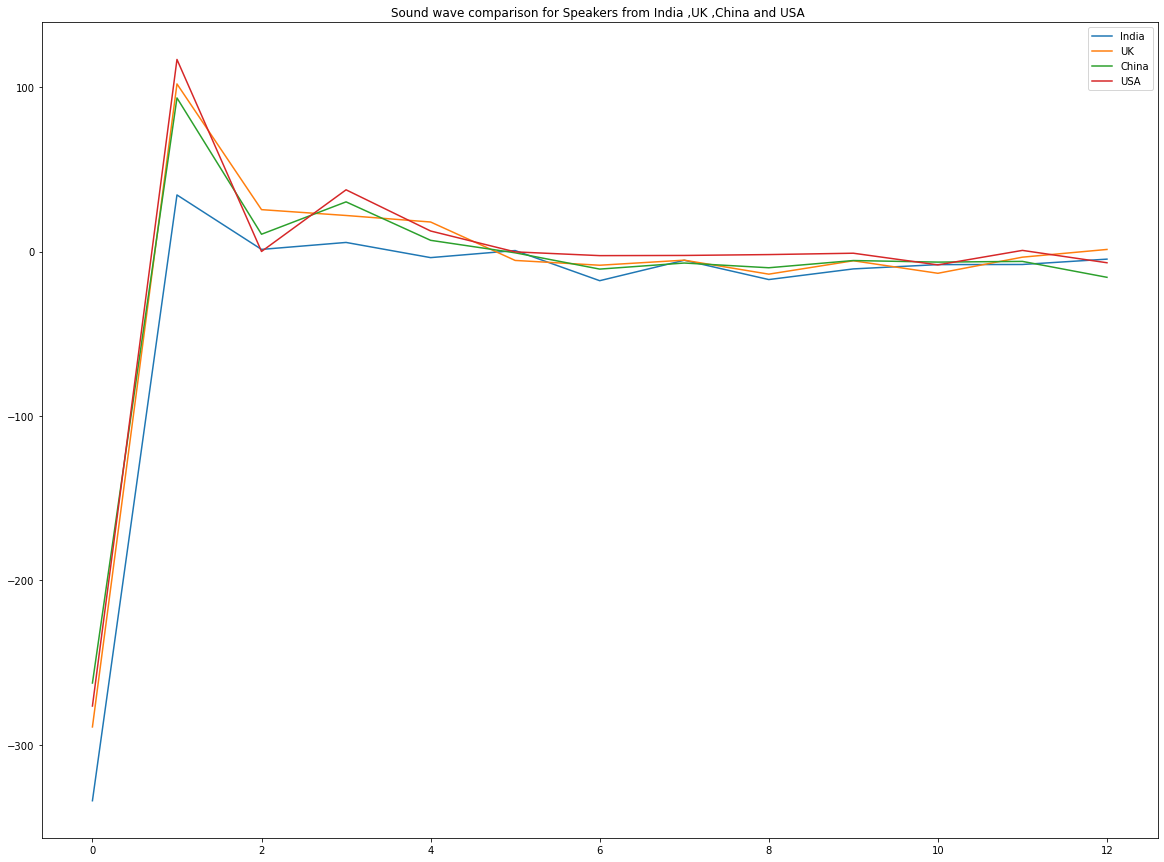

In [52]:
plt.figure(figsize=(20, 15))
#plt.subplot(3,1,1)
plt.plot(mfcc_in1, label='India')
plt.plot(mfcc_uk1, label='UK')
plt.plot(mfcc_ch1, label='China')
plt.plot(mfcc_us1, label='USA')

plt.legend()
plt.title('Sound wave comparison for Speakers from India ,UK ,China and USA ');